# Time Series Fundamentals with Tensorflow


* Dataset Link -> https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

## Explaination

> The `BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv` file has roughly ~8yrs of bitcoin prices, calculated on a daily basis which amounts to `2787` samples.

> Typically a machine learning models requires `lots and lots of samples`.

> In `time series problems`, we will be often coming across datasets which do not have `sufficient or smaller number of samples`.

### Seasonality

> The frequency at which a time series value is collected is often referred to as `seasonality`. This is usually mesaured in number of samples per year. For example, collecting the price of Bitcoin once per day would result in a time series with a `seasonality of 365`. Time series data collected with different seasonality values often exhibit seasonal patterns (`e.g.` electricity demand behing higher in Summer months for air conditioning than Winter months)

In [ ]:
!wget https://raw.githubusercontent.com/arghanath007/MachineLearning/main/helper_functions.py

--2022-09-06 12:03:23--  https://raw.githubusercontent.com/arghanath007/MachineLearning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23370 (23K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  22.82K  --.-KB/s    in 0s      

2022-09-06 12:03:23 (113 MB/s) - ‘helper_functions.py’ saved [23370/23370]



In [99]:
from helper_functions import model_check_point_callback, plot_loss_curves

## Getting the data

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-09-06 11:52:33--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2022-09-06 11:52:33 (63.6 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [2]:
import pandas as pd

In [3]:
bitcoin_df= pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', parse_dates=["Date"], index_col=["Date"])
bitcoin_df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


## Getting the Data

Link -> https://finance.yahoo.com/quote/BTC-USD/

In [4]:
!wget https://media.githubusercontent.com/media/arghanath007/MachineLearning/main/Time%20Series/BTC-USD.csv

--2022-09-06 11:52:34--  https://media.githubusercontent.com/media/arghanath007/MachineLearning/main/Time%20Series/BTC-USD.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 236367 (231K) [text/plain]
Saving to: ‘BTC-USD.csv’

BTC-USD.csv         100%[===================>] 230.83K  --.-KB/s    in 0.003s  

2022-09-06 11:52:34 (80.5 MB/s) - ‘BTC-USD.csv’ saved [236367/236367]



In [5]:
bitcoin_df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [6]:
bitcoin_updated_df= pd.read_csv('/content/BTC-USD.csv', parse_dates=["Date"], index_col=["Date"])
bitcoin_updated_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,13600700
2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,11416800
2014-10-19,391.253998,393.938995,386.457001,389.545990,389.545990,5914570
2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000
2014-10-21,382.420990,392.645996,380.834015,386.475006,386.475006,14188900
...,...,...,...,...,...,...
2022-09-01,20050.498047,20198.390625,19653.968750,20127.140625,20127.140625,30182031010
2022-09-02,20126.072266,20401.568359,19814.765625,19969.771484,19969.771484,29123998928
2022-09-03,19969.718750,20037.009766,19698.355469,19832.087891,19832.087891,23613051457


In [7]:
len(bitcoin_updated_df)

2881

In [8]:
len(bitcoin_df)

2787

In [9]:
bitcoin_updated_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-01,20050.498047,20198.390625,19653.968750,20127.140625,20127.140625,30182031010
2022-09-02,20126.072266,20401.568359,19814.765625,19969.771484,19969.771484,29123998928
2022-09-03,19969.718750,20037.009766,19698.355469,19832.087891,19832.087891,23613051457
2022-09-04,19832.470703,19999.689453,19636.816406,19986.712891,19986.712891,25245861652
2022-09-05,20027.300781,20027.300781,19674.099609,19728.171875,19728.171875,27602620416


In [10]:
bitcoin_df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


## DataFrame `Info`

In [11]:
bitcoin_updated_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2881 entries, 2014-10-17 to 2022-09-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2881 non-null   float64
 1   High       2881 non-null   float64
 2   Low        2881 non-null   float64
 3   Close      2881 non-null   float64
 4   Adj Close  2881 non-null   float64
 5   Volume     2881 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 157.6 KB


In [12]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [13]:
bitcoin_updated_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2881.000000,2881.000000,2881.000000,2881.000000,2881.000000,2.881000e+03
mean,12760.639947,13090.281559,12392.254797,12765.714959,12765.714959,1.588919e+10
std,16507.337512,16932.420444,16015.174849,16502.554117,16502.554117,1.987690e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,665.914978,681.554993,654.786011,666.523010,666.523010,9.913510e+07
50%,6755.140137,6907.959961,6617.166992,6769.939941,6769.939941,6.531940e+09
75%,13031.201172,13651.516602,12747.700195,13075.248047,13075.248047,2.724657e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [14]:
len(bitcoin_df) / 365

7.635616438356164

## Visualizing the dataset

In [15]:
bitcoin_prices= pd.DataFrame(bitcoin_updated_df['Close']).rename(columns={"Close": "Price"})
bitcoin_prices

,Price
Date,
2014-10-17,383.757996
2014-10-18,391.441986
2014-10-19,389.545990
2014-10-20,382.845001
2014-10-21,386.475006
...,...
2022-09-01,20127.140625
2022-09-02,19969.771484
2022-09-03,19832.087891


In [16]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Price of Bitcon')

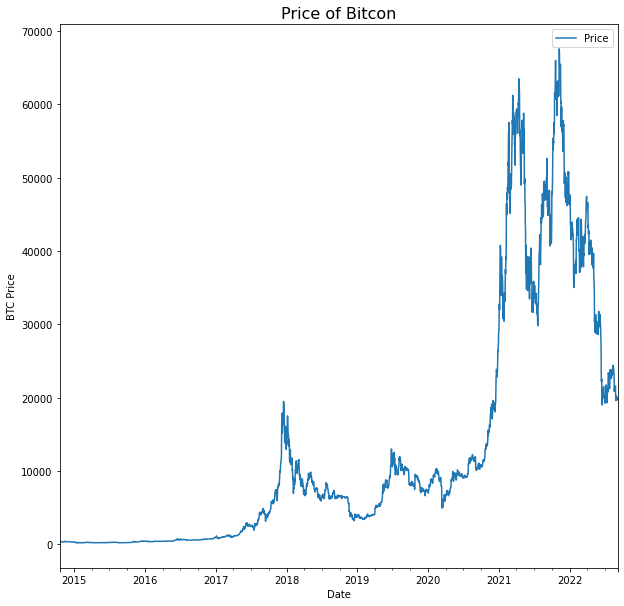

In [17]:
bitcoin_prices.plot(figsize=(10,10))
plt.ylabel("BTC Price")
plt.title("Price of Bitcon", fontsize=16)

In [18]:
bitcoin_df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [19]:
bitcoin_updated_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-10-17,382.756012,385.477997,375.389008,383.757996,383.757996,13600700
2014-10-18,383.976013,395.157990,378.971008,391.441986,391.441986,11416800
2014-10-19,391.253998,393.938995,386.457001,389.545990,389.545990,5914570
2014-10-20,389.230988,390.084015,378.252014,382.845001,382.845001,16419000
2014-10-21,382.420990,392.645996,380.834015,386.475006,386.475006,14188900


## Importing the `bitcon prices csv file using python`

Link -> https://realpython.com/python-csv/

In [20]:
import csv
from datetime import datetime

timesteps=[]
btc_prices=[]

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
      timesteps.append(datetime.strptime(line[1], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
      btc_prices.append(float(line[2])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_prices[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

In [21]:
import csv
from datetime import datetime

timesteps=[]
btc_prices=[]

with open('/content/BTC-USD.csv', 'r') as f:
  csv_reader = csv.reader(f, delimiter=",")
  next(csv_reader)
  for line in csv_reader:
      timesteps.append(datetime.strptime(line[0], "%Y-%m-%d")) # get the dates as dates (not strings), strptime = string parse time
      btc_prices.append(float(line[4])) # get the closing price as float

# View first 10 of each
timesteps[:10], btc_prices[:10]

([datetime.datetime(2014, 10, 17, 0, 0),
  datetime.datetime(2014, 10, 18, 0, 0),
  datetime.datetime(2014, 10, 19, 0, 0),
  datetime.datetime(2014, 10, 20, 0, 0),
  datetime.datetime(2014, 10, 21, 0, 0),
  datetime.datetime(2014, 10, 22, 0, 0),
  datetime.datetime(2014, 10, 23, 0, 0),
  datetime.datetime(2014, 10, 24, 0, 0),
  datetime.datetime(2014, 10, 25, 0, 0),
  datetime.datetime(2014, 10, 26, 0, 0)],
 [383.757996,
  391.441986,
  389.54599,
  382.845001,
  386.475006,
  383.15799,
  358.416992,
  358.345001,
  347.270996,
  354.70401])

## Visualizing the dataset

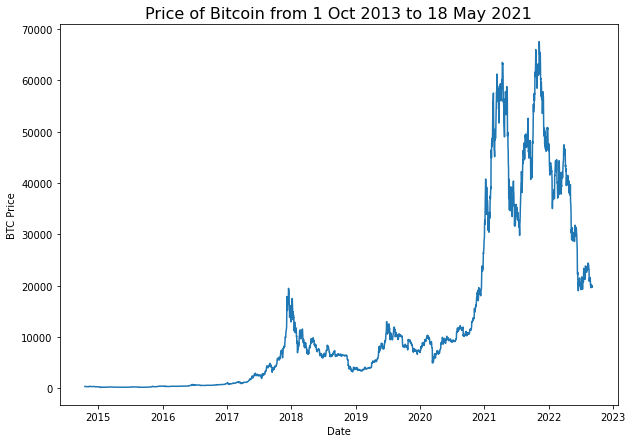

In [22]:
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_prices)
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

## `Format Data Type 1`: Creating the train and test datasets from the time series dataset

In [23]:
bitcoin_prices[:5]

,Price
Date,
2014-10-17,383.757996
2014-10-18,391.441986
2014-10-19,389.545990
2014-10-20,382.845001
2014-10-21,386.475006


### Creating the datasets the `wrong way`

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
timesteps= bitcoin_prices.index.to_numpy()
prices= bitcoin_prices['Price'].to_numpy()

timesteps[:5], prices[:5]

(array(['2014-10-17T00:00:00.000000000', '2014-10-18T00:00:00.000000000',
        '2014-10-19T00:00:00.000000000', '2014-10-20T00:00:00.000000000',
        '2014-10-21T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([383.757996, 391.441986, 389.54599 , 382.845001, 386.475006]))

In [26]:
X_train, X_test, y_train, y_test= train_test_split(timesteps, prices, test_size=0.2, random_state=22)

len(X_train), len(X_test), X_train.shape, X_test.shape

(2304, 577, (2304,), (577,))

## Let's plot wrong train and test splits

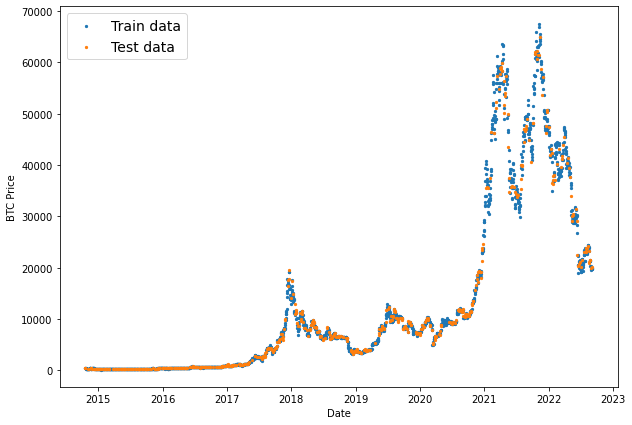

In [27]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

### Creating the datasets the `right way`

In [28]:
split_sizes= int(0.8 * len(prices))

X_train, y_train= timesteps[:split_sizes], prices[:split_sizes]

X_test, y_test= timesteps[split_sizes: ], prices[split_sizes: ]

len(X_train), len(X_test), len(X_train), len(X_test)

(2304, 577, 2304, 577)

### Let's plot `right` train and test splits

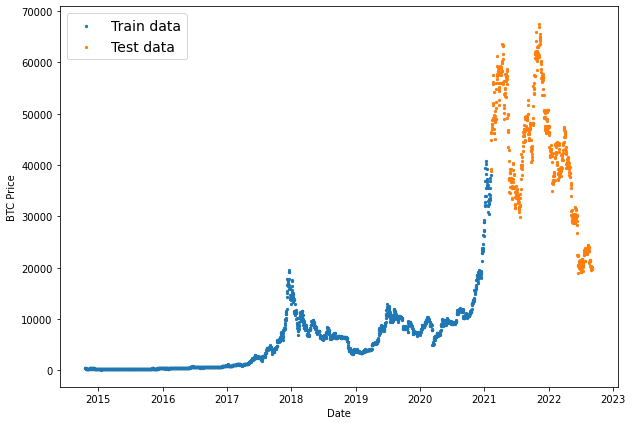

In [29]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

##Create a plotting function

> Plotting function to plot the datasets 


In [30]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, ylabel,format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  ylabel: The ylabel of the plot, string type.
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel(ylabel)
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

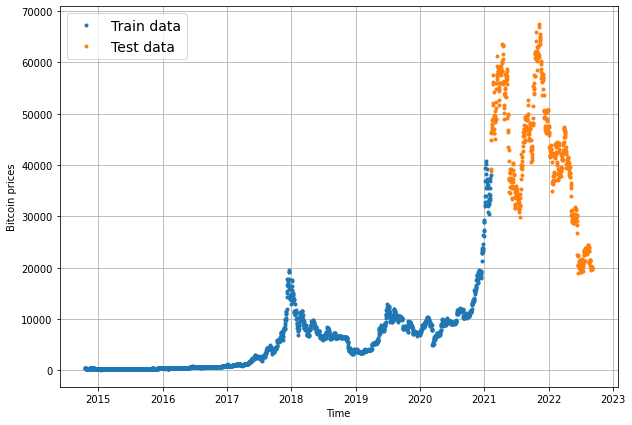

In [31]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data", ylabel="Bitcoin prices")
plot_time_series(timesteps=X_test, values=y_test, label="Test data", ylabel="Bitcoin prices")

## Modelling Experiments

> Before we discuss what modelling experiments we're going to run, there are two terms you should be familiar with, horizon and window.

* **Horizon** = `number of timesteps to predict into future`
* **Window size**= `number of timesteps from past used to predict horizon`

> For example, if we wanted to predict the price of Bitcoin for tomorrow (1 day in the future) using the previous week's worth of Bitcoin prices (7 days in the past), the horizon would be 1 and the window would be 7.

### Experiment List: 

| Model Number | Model Type | Horizon size | Window size | Extra data |
| ----- | ----- | ----- | ----- | ----- |
| 0 | Naïve model (baseline) | NA | NA | NA |
| 1 | Dense model | 1 | 7 | NA |
| 2 | Same as 1 | 1 | 30 | NA | 
| 3 | Same as 1 | 7 | 30 | NA |
| 4 | Conv1D | 1 | 7 | NA |
| 5 | LSTM | 1 | 7 | NA |
| 6 | Same as 1 (but with multivariate data) | 1 | 7 | Block reward size |
| 7 | [N-BEATs Algorithm](https://arxiv.org/pdf/1905.10437.pdf) | 1 | 7 | NA |
| 8 | Ensemble (multiple models optimized on different loss functions) | 1 | 7 | NA | 
| 9 | Future prediction model (model to predict future values) | 1 | 7 | NA| 
| 10 | Same as 1 (but with turkey 🦃 data introduced) | 1 | 7 | NA |


>To reiterate, as you can see, we can build many types of models for the data we're working with. But that doesn't mean that they'll perform well. Deep learning is a powerful technique but it doesn't always work. And as always, start with a simple model first and then add complexity as needed.



## `Model 0`: Naive Forecasting(baseline)

* Docs -> https://otexts.com/fpp2/simple-methods.html

In [32]:
y_test[:5]

array([39266.011719, 38903.441406, 46196.464844, 46481.105469,
       44918.183594])

### Creating a Naive forecast

In [33]:
naive_forecast= y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([39266.011719, 38903.441406, 46196.464844, 46481.105469,
        44918.183594, 47909.332031, 47504.851563, 47105.515625,
        48717.289063, 47945.058594]),
 array([20260.019531, 20041.738281, 19616.814453, 20297.994141,
        19796.808594, 20049.763672, 20127.140625, 19969.771484,
        19832.087891, 19986.712891]))

In [34]:
y_test[-10:]

array([20041.738281, 19616.814453, 20297.994141, 19796.808594,
       20049.763672, 20127.140625, 19969.771484, 19832.087891,
       19986.712891, 19728.171875])

### Plotting the Naive forecast

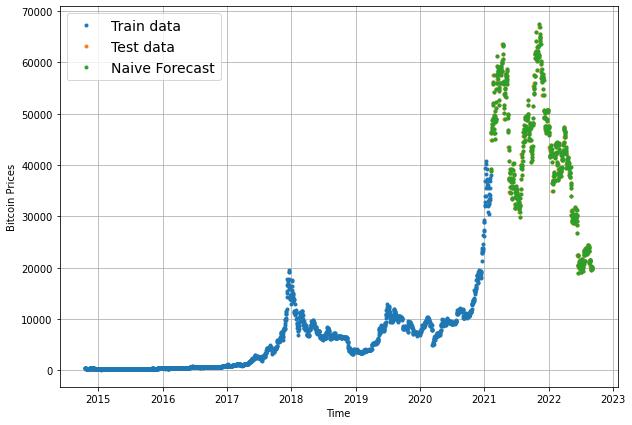

In [35]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data", ylabel="Bitcoin Prices")
plot_time_series(timesteps=X_test, values=y_test, label="Test data", ylabel="Bitcoin Prices")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, label="Naive Forecast", ylabel="Bitcoin Prices")

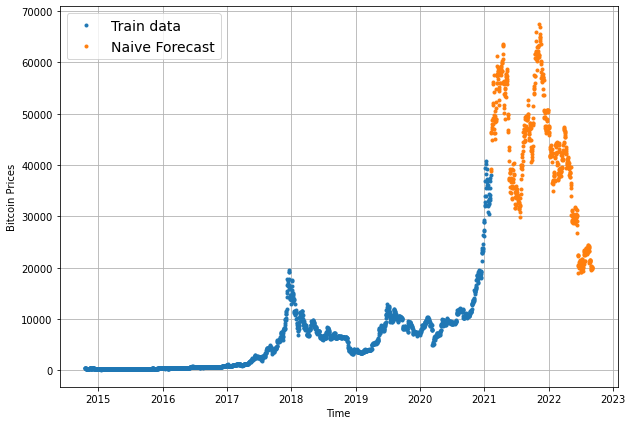

In [36]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data", ylabel="Bitcoin Prices")
# plot_time_series(timesteps=X_test, values=y_test, label="Test data", ylabel="Bitcoin Prices")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, label="Naive Forecast", ylabel="Bitcoin Prices")

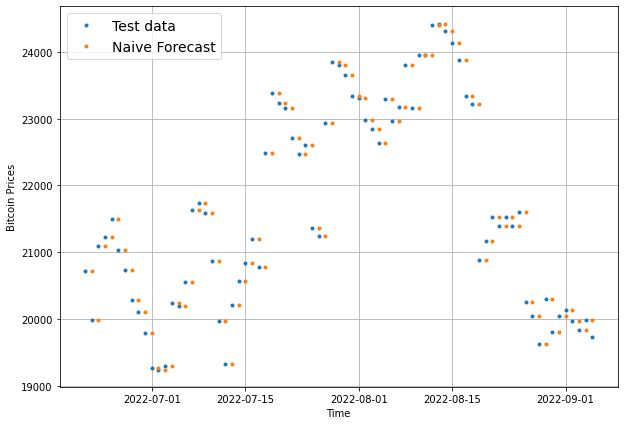

In [37]:
plt.figure(figsize=(10,7))
# plot_time_series(timesteps=X_train, values=y_train, label="Train data", ylabel="Bitcoin Prices")
plot_time_series(timesteps=X_test, values=y_test, label="Test data", start=500, ylabel="Bitcoin Prices")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, label="Naive Forecast", start=500, ylabel="Bitcoin Prices")

## Evaluating a time series model

> Time series forecasting often involves predicting a number (in our case, the price of Bitcoin). And what kind of problem is predicting a number?

> **Regression**.

With this known, we can use regression evaluation metrics to evaluate our time series forecasts.

The main thing we will be evaluating is: **how do our model's predictions (`y_pred`) compare against the actual values (`y_true` or *ground truth values*)**? 

> 📖 **Resource:** We're going to be using several metrics to evaluate our different model's time series forecast accuracy. Many of them are sourced and explained mathematically and conceptually in [Forecasting: Principles and Practice chapter 5.8](https://otexts.com/fpp3/accuracy.html), I'd recommend reading through here for a more in-depth overview of what we're going to practice.

For all of the following metrics, **lower is better** (for example an MAE of 0 is better than an MAE 100).

### Scale-dependent errors

These are metrics which can be used to compare time series values and forecasts that are on the same scale.

For example, Bitcoin historical prices in USD veresus Bitcoin forecast values in USD.

| Metric | Details | Code |
| ----- | ----- | ----- |
| **MAE** (mean absolute error) | Easy to interpret (a forecast is X amount different from actual amount). Forecast methods which minimises the MAE will lead to forecasts of the median. | [`tf.keras.metrics.mean_absolute_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/MeanAbsoluteError) |
| **RMSE** (root mean square error) | Forecasts which minimise the RMSE lead to forecasts of the mean. | `tf.sqrt(`[`tf.keras.metrics.mean_square_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/RootMeanSquaredError)`)`|

### Percentage errors

Percentage errors do not have units, this means they can be used to compare forecasts across different datasets.

| **Metric** | **Details** | **Code** |
| ----- | ----- | ----- |
| **MAPE** (mean absolute percentage error) | Most commonly used percentage error. May explode (not work) if `y=0`. | [`tf.keras.metrics.mean_absolute_percentage_error()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/MAPE) | 
| **sMAPE** (symmetric mean absolute percentage error) | Recommended not to be used by [Forecasting: Principles and Practice](https://otexts.com/fpp3/accuracy.html#percentage-errors), though it is used in forecasting competitions. | Custom implementation |

### Scaled errors

Scaled errors are an alternative to percentage errors when comparing forecast performance across different time series.

| **Metric** | **Details** | **Code** |
| ----- | ----- | ----- |
| **MASE** (mean absolute scaled error). | MASE equals one for the naive forecast (or very close to one). A forecast which performs better than the naïve should get <1 MASE. | See sktime's [`mase_loss()`](https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16) |

> 🤔 **Question:** There are so many metrics... which one should I pay most attention to? It's going to depend on your problem. However, since its ease of interpretation (you can explain it in a sentence to your grandma), MAE is often a very good place to start.

Since we're going to be evaluing a lot of models, let's write a function to help us calculate evaluation metrics on their forecasts.

In [38]:
import tensorflow as tf
import numpy as np

In [39]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [40]:
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

0.9988074616716925

## Function to evaluate a time series model

In [41]:
def evaluate_preds(y_true, y_pred):
  """
    Description:
      Function to get the different evaluation metrics of a time series model.
    Parameters:
      y_true: The truth/actual values.(y_test)
      y_pred: The predicted values of the model(y_preds)
  """
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


In [96]:
naive_results= evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 1156.6283501875,
 'mse': 2681841.620560925,
 'rmse': 1637.6329321801406,
 'mape': 2.7766003833746318,
 'mase': 0.9988074616716925}

In [43]:
y_test.dtype

dtype('float64')

In [44]:
naive_forecast[-10:]

array([20260.019531, 20041.738281, 19616.814453, 20297.994141,
       19796.808594, 20049.763672, 20127.140625, 19969.771484,
       19832.087891, 19986.712891])

In [45]:
tf.reduce_mean(y_test).numpy()

41924.317618164634

In [46]:
tf.reduce_max(y_test).numpy(), tf.reduce_min(y_test).numpy()

(67566.828125, 19017.642578)

## `Format Data Type 2`: Windowing dataset

> For example for a univariate time series, windowing for one week (`window=7`) to predict the next single value (`horizon=1`) might look like:

```
Window for one week (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

> Or for the price of Bitcoin, it'd look like:

```
Window for one week with the target of predicting the next day (Bitcoin prices)

[123.654, 125.455, 108.584, 118.674, 121.338, 120.655, 121.795] -> [123.033]
[125.455, 108.584, 118.674, 121.338, 120.655, 121.795, 123.033] -> [124.049]
[108.584, 118.674, 121.338, 120.655, 121.795, 123.033, 124.049] -> [125.961]
```


In [47]:
bitcoin_prices[:5]

,Price
Date,
2014-10-17,383.757996
2014-10-18,391.441986
2014-10-19,389.545990
2014-10-20,382.845001
2014-10-21,386.475006


In [48]:
len(bitcoin_prices)

2881

In [49]:
len(btc_prices)

2881

In [50]:
btc_prices[:5]

[383.757996, 391.441986, 389.54599, 382.845001, 386.475006]

## Global Values for `Horizon` and `Window_Size`

In [51]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

## Functuon to `label windowed data`

In [52]:
def get_labelled_windows(x, horizon=HORIZON):
  """
    Description:
      Creates labels for windowed dataset.
      E.g, 
        if horizon=1
        Input: [0,1,2,3,4,5,6,7] -> Output: ([0,1,2,3,4,5,6], [7])
  """

  return x[:, :-horizon], x[:, -horizon:]

In [53]:
test_window, test_label= get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
test_window.numpy(), test_label.numpy()

(array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32), array([[7]], dtype=int32))

## Numpy indexing

* Docs -> https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing

### Steps for the function

1. Creates a window step of specific window size, for example: [[0, 1, 2, 3, 4, 5, 6, 7]]
2. Uses NumPy indexing to create a 2D of multiple window steps, for example:

```
[[0, 1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [2, 3, 4, 5, 6, 7, 8, 9]]
```

3. Uses the 2D array of multi-tuple window steps to index on a target series
4. Uses the `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon

In [54]:
np.expand_dims(np.arange(10), axis=0)

array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]])

In [55]:
np.expand_dims(np.arange(10) + 1, axis=0)

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]])

In [56]:
prices[:5]

array([383.757996, 391.441986, 389.54599 , 382.845001, 386.475006])

In [57]:
len(prices)

2881

### Function to view numpy arrays as windows

In [137]:
def make_windows(x, window_size=WINDOW_SIZE, horizon= HORIZON):
  """
    Description:
      Turns a 1D array into a 2D array of sequential labelled windows of "window_size" with "horizon_size" labels. 

    Returns:
      It returns a tuple (windows, labels).
  """

  # 1 Creates a window step of specific window size
  window_step= np.expand_dims(np.arange(window_size + horizon), axis=0)

  # 2 Uses NumPy indexing to create a 2D of multiple window steps
  window_indexes= window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon-1)), axis=0).T # create 2D array of windows of size window_size

  # 3 Uses the 2D array of multuple window steps to index on a target series
  windowed_array= x[window_indexes]

  # 4 Uses the get_labelled_windows() function we created above to turn the window steps into windows with a specified horizon
  windows, labels= get_labelled_windows(windowed_array, horizon=horizon)
  return windows, labels

In [59]:
full_windows, full_labels= make_windows(prices)

len(full_windows), len(full_labels)

(2874, 2874)

In [60]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [383.757996 391.441986 389.54599  382.845001 386.475006 383.15799
 358.416992] -> Label: [358.345001]
Window: [391.441986 389.54599  382.845001 386.475006 383.15799  358.416992
 358.345001] -> Label: [347.270996]
Window: [389.54599  382.845001 386.475006 383.15799  358.416992 358.345001
 347.270996] -> Label: [354.70401]


In [61]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3:]} -> Label: {full_labels[i-3]}")

Window: [[20041.738281 19616.814453 20297.994141 19796.808594 20049.763672
  20127.140625 19969.771484]
 [19616.814453 20297.994141 19796.808594 20049.763672 20127.140625
  19969.771484 19832.087891]
 [20297.994141 19796.808594 20049.763672 20127.140625 19969.771484
  19832.087891 19986.712891]] -> Label: [19832.087891]
Window: [[19616.814453 20297.994141 19796.808594 20049.763672 20127.140625
  19969.771484 19832.087891]
 [20297.994141 19796.808594 20049.763672 20127.140625 19969.771484
  19832.087891 19986.712891]] -> Label: [19986.712891]
Window: [[20297.994141 19796.808594 20049.763672 20127.140625 19969.771484
  19832.087891 19986.712891]] -> Label: [19728.171875]


## Tensorflow build-in function which does the same as the above function `make_windows`

* Link -> https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

In [62]:
# full_dataset= tf.keras.preprocessing.timeseries_dataset_from_array(prices[:-10], prices[10:], sequence_length=10)
# full_dataset

In [63]:
# len(full_dataset)

In [64]:
# 23 *7

In [65]:
# for batch in full_dataset:
#   inputs, targets = batch
#   assert np.array_equal(inputs[0], prices[:10])  # First sequence: steps [0-9]
#   assert np.array_equal(targets[0], prices[10])  # Corresponding target: step 10
#   break


In [66]:
# len(inputs)

In [67]:
# len(targets)

In [68]:
# batch[1]

In [69]:
# inputs[:-1]

In [70]:
# targets[1:]

## Turning windows into training and test sets

In [71]:
full_windows[:5], full_labels[:5]

(array([[383.757996, 391.441986, 389.54599 , 382.845001, 386.475006,
         383.15799 , 358.416992],
        [391.441986, 389.54599 , 382.845001, 386.475006, 383.15799 ,
         358.416992, 358.345001],
        [389.54599 , 382.845001, 386.475006, 383.15799 , 358.416992,
         358.345001, 347.270996],
        [382.845001, 386.475006, 383.15799 , 358.416992, 358.345001,
         347.270996, 354.70401 ],
        [386.475006, 383.15799 , 358.416992, 358.345001, 347.270996,
         354.70401 , 352.989014]]), array([[358.345001],
        [347.270996],
        [354.70401 ],
        [352.989014],
        [357.618011]]))

## Funtion to make train/test splits for time series problems

In [141]:
def make_train_test_split(windows, labels, test_split=0.2):
  """
    Description: 
      Splits matching pairs of windows and labels into train and test split.

    Parameters: 
      windows -> The dataset(X)
      labels -> The labels of the dataset(y)
      test_split -> The ratio in which the dataset is to be split. Default is "0.2"

    Returns: 
      It is returned in this format -> train_windows, test_windows, train_labels, test_labels
  """

  split_size= int((1- test_split) * len(windows))
  train_windows= windows[:split_size]
  train_labels= labels[:split_size]

  test_windows= windows[split_size:]
  test_labels= labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [73]:
train_windows, test_windows, train_labels, test_labels= make_train_test_split(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2299, 575, 2299, 575)

In [74]:
len(full_windows) * 0.8

2299.2000000000003

In [75]:
train_windows[:5]

array([[383.757996, 391.441986, 389.54599 , 382.845001, 386.475006,
        383.15799 , 358.416992],
       [391.441986, 389.54599 , 382.845001, 386.475006, 383.15799 ,
        358.416992, 358.345001],
       [389.54599 , 382.845001, 386.475006, 383.15799 , 358.416992,
        358.345001, 347.270996],
       [382.845001, 386.475006, 383.15799 , 358.416992, 358.345001,
        347.270996, 354.70401 ],
       [386.475006, 383.15799 , 358.416992, 358.345001, 347.270996,
        354.70401 , 352.989014]])

In [76]:
train_labels[:5]

array([[358.345001],
       [347.270996],
       [354.70401 ],
       [352.989014],
       [357.618011]])

In [77]:
test_windows[:5]

array([[33537.175781, 35510.289063, 37472.089844, 36926.066406,
        38144.308594, 39266.011719, 38903.441406],
       [35510.289063, 37472.089844, 36926.066406, 38144.308594,
        39266.011719, 38903.441406, 46196.464844],
       [37472.089844, 36926.066406, 38144.308594, 39266.011719,
        38903.441406, 46196.464844, 46481.105469],
       [36926.066406, 38144.308594, 39266.011719, 38903.441406,
        46196.464844, 46481.105469, 44918.183594],
       [38144.308594, 39266.011719, 38903.441406, 46196.464844,
        46481.105469, 44918.183594, 47909.332031]])

In [78]:
test_labels[:5]

array([[46196.464844],
       [46481.105469],
       [44918.183594],
       [47909.332031],
       [47504.851563]])

In [86]:
train_windows.shape

(2299, 7)

### Check to see if same (accounting for horizon and window size)

In [79]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

## Make a modelling checkpoint callback

In [101]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            monitor='val_loss',
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

In [91]:
train_windows.dtype

dtype('float64')

## `Model 1`: Dense model(window=7, horizon=1)

### Steps:


* A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs


In [85]:
import tensorflow as tf
from tensorflow.keras import layers

In [92]:
inputs= layers.Input(shape=(WINDOW_SIZE,), dtype="float64", name="model_1_inputs")
x= layers.Dense(128, activation='relu')(inputs)
outputs= layers.Dense(HORIZON, activation='linear')(x)
model_1= tf.keras.Model(inputs, outputs, name="model_1_dense")

model_1.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(), metrics=['mae', 'mse'])

In [130]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_1_inputs (InputLayer)  [(None, 7)]              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1024      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [94]:
history_model_1= model_1.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint(model_name='model_1_dense', save_path='model_experiments')])

Epoch 1/100
18/18 [==============================] - 1s 47ms/step - loss: 244.5530 - mae: 244.5530 - mse: 272231.4375 - val_loss: 1666.6718 - val_mae: 1666.6718 - val_mse: 4781947.5000
Epoch 2/100
18/18 [==============================] - 1s 33ms/step - loss: 229.2390 - mae: 229.2390 - mse: 258433.8438 - val_loss: 1605.8754 - val_mae: 1605.8754 - val_mse: 4580334.5000
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 226.5308 - mae: 226.5308 - mse: 252772.0469 - val_loss: 1687.2498 - val_mae: 1687.2498 - val_mse: 4825759.5000
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 226.2482 - mae: 226.2482 - mse: 249680.8750 - val_loss: 1619.5649 - val_mae: 1619.5649 - val_mse: 4725416.5000
Epoch 5/100
18/18 [==============================] - 1s 33ms/step - loss: 226.3559 - mae: 226.3559 - mse: 251732.6562 - val_loss: 1522.0623 - val_mae: 1522.0623 - val_mse: 4126243.5000
Epoch 6/100
18/18 [==============================] - 0s 5ms/step - loss: 215.

In [97]:
naive_results

{'mae': 1156.6283501875,
 'mse': 2681841.620560925,
 'rmse': 1637.6329321801406,
 'mape': 2.7766003833746318,
 'mase': 0.9988074616716925}

### Evaluating the model

In [103]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1250.7869 - mae: 1250.7869 - mse: 2992875.0000


[1250.786865234375, 1250.786865234375, 2992875.0]

In [104]:
model_1_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_1_dense/')

In [105]:
model_1_checkpoint.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 1ms/step - loss: 1183.3540 - mae: 1183.3540 - mse: 2734868.5000


[1183.35400390625, 1183.35400390625, 2734868.5]

In [112]:
# model_1_pred_preds= model_1_checkpoint.predict(test_windows)
# model_1_preds= tf.argmax(model_1_pred_preds, axis=0)
# model_1_preds[:5]

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([275])>

In [114]:
# model_1_results= evaluate_preds(test_labels, model_1_preds)
# model_1_results

InvalidArgumentError: ignored

## Making a function to return the predictions of a model

In [122]:
def make_preds(model, input_data):
  """
  Description:
    Uses model to make predictions on input_data.

  Parameters:
    model: trained model 
    input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.cast(tf.squeeze(forecast), dtype="float64") # return 1D array of predictions

In [123]:
model_1_preds= make_preds(model_1_checkpoint, test_windows)
model_1_preds[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([39018.30859375, 44831.0546875 , 46790.60546875, 44867.51953125,
       47313.69921875])>

In [125]:
model_1_results= evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': 1183.3538926726085,
 'mse': 2734868.528680281,
 'rmse': 1653.7437917284167,
 'mape': 2.839415515895834,
 'mase': 1.0314059843811472}

In [126]:
naive_results

{'mae': 1156.6283501875,
 'mse': 2681841.620560925,
 'rmse': 1637.6329321801406,
 'mape': 2.7766003833746318,
 'mase': 0.9988074616716925}

## Autocorrelation time series

* Link -> https://otexts.com/fpp2/autocorrelation.html#

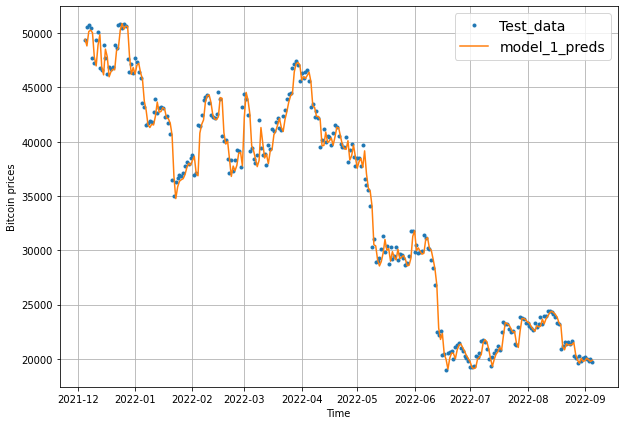

In [129]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data", ylabel="Bitcoin prices")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds", ylabel="Bitcoin prices")

## `Model 2`: Dense model(window=30, horizon=1)

### Steps:


* A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs


In [132]:
WINDOW_SIZE, HORIZON

(7, 1)

In [133]:
WINDOW_SIZE= 30

inputs= layers.Input(shape=(WINDOW_SIZE,), dtype="float32", name="model_2_inputs")
x= layers.Dense(128, activation="relu")(inputs)
outputs= layers.Dense(HORIZON, activation='linear')(x)
model_2= tf.keras.Model(inputs, outputs, name="model_2_dense")

In [134]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_2_inputs (InputLayer)  [(None, 30)]             0         
                                                                 
 dense_4 (Dense)             (None, 128)               3968      
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [144]:
WINDOW_SIZE, HORIZON

(30, 1)

## Creating the new windows datasets

In [138]:
new_30_windows, new_30_labels= make_windows(prices,WINDOW_SIZE, HORIZON)

In [140]:
len(new_30_windows), len(new_30_labels)

(2851, 2851)

## Splitting the new windows datasets

In [142]:
train_windows, test_windows, train_labels, test_labels= make_train_test_split(new_30_windows, new_30_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2280, 571, 2280, 571)

In [150]:
train_windows[:3], train_labels[:3], train_windows.shape

(array([[383.757996, 391.441986, 389.54599 , 382.845001, 386.475006,
         383.15799 , 358.416992, 358.345001, 347.270996, 354.70401 ,
         352.989014, 357.618011, 335.591003, 345.304993, 338.321014,
         325.748993, 325.891998, 327.553986, 330.492004, 339.485992,
         349.290009, 342.415009, 345.488007, 363.264008, 366.924011,
         367.695007, 423.561005, 420.734985, 397.817993, 376.132996],
        [391.441986, 389.54599 , 382.845001, 386.475006, 383.15799 ,
         358.416992, 358.345001, 347.270996, 354.70401 , 352.989014,
         357.618011, 335.591003, 345.304993, 338.321014, 325.748993,
         325.891998, 327.553986, 330.492004, 339.485992, 349.290009,
         342.415009, 345.488007, 363.264008, 366.924011, 367.695007,
         423.561005, 420.734985, 397.817993, 376.132996, 387.881989],
        [389.54599 , 382.845001, 386.475006, 383.15799 , 358.416992,
         358.345001, 347.270996, 354.70401 , 352.989014, 357.618011,
         335.591003, 345.304993,

In [143]:
model_2.compile(loss="mse", optimizer= tf.keras.optimizers.Adam(), metrics=['mse','mae'])

history_2= model_2.fit(train_windows, train_labels, epochs=100, batch_size=128,validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint('model_2_dense')])

Epoch 1/100
18/18 [==============================] - 1s 43ms/step - loss: 16487243.0000 - mse: 16487243.0000 - mae: 2304.9426 - val_loss: 53796828.0000 - val_mse: 53796828.0000 - val_mae: 6295.7256
Epoch 2/100
18/18 [==============================] - 1s 34ms/step - loss: 1687669.7500 - mse: 1687669.7500 - mae: 634.4973 - val_loss: 23539384.0000 - val_mse: 23539384.0000 - val_mae: 3915.4961
Epoch 3/100
18/18 [==============================] - 1s 35ms/step - loss: 1065708.2500 - mse: 1065708.2500 - mae: 533.6258 - val_loss: 12953024.0000 - val_mse: 12953024.0000 - val_mae: 2750.9587
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 889011.0625 - mse: 889011.0625 - mae: 456.1227 - val_loss: 23058572.0000 - val_mse: 23058572.0000 - val_mae: 3912.8892
Epoch 5/100
18/18 [==============================] - 1s 35ms/step - loss: 820833.0625 - mse: 820833.0625 - mae: 433.0018 - val_loss: 12426066.0000 - val_mse: 12426066.0000 - val_mae: 2767.3762
Epoch 6/100
18/18 [========

### Evaluating the model

In [146]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 11352328.0000 - mse: 11352328.0000 - mae: 2823.3721


[11352328.0, 11352328.0, 2823.3720703125]

In [147]:
model_2_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_2_dense/')
model_2_checkpoint

In [148]:
model_2_checkpoint.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 3430077.7500 - mse: 3430077.7500 - mae: 1392.1251


[3430077.75, 3430077.75, 1392.1251220703125]

### Making prediction on the model

In [151]:
model_2_preds= make_preds(model_2_checkpoint, test_windows)
model_2_preds[:5]

<tf.Tensor: shape=(5,), dtype=float64, numpy=
array([47538.734375 , 48471.125    , 48913.171875 , 48385.46875  ,
       49351.2578125])>

In [152]:
model_2_results= evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

{'mae': 1392.125215500219,
 'mse': 3430078.10778425,
 'rmse': 1852.0470047448175,
 'mape': 3.3824104062040226,
 'mase': 1.214584601495581}

In [153]:
model_1_results

{'mae': 1183.3538926726085,
 'mse': 2734868.528680281,
 'rmse': 1653.7437917284167,
 'mape': 2.839415515895834,
 'mase': 1.0314059843811472}

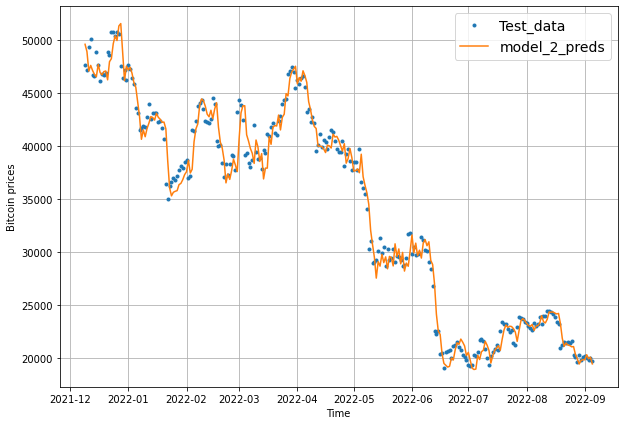

In [154]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data", ylabel="Bitcoin prices")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds", ylabel="Bitcoin prices")

In [156]:
WINDOW_SIZE, HORIZON

(30, 1)

## `Model 3`: Dense model(window=30, horizon=7)

### Steps:


* A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
* An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs


## Creating the new windows datasets

In [157]:
WINDOW_SIZE= 30
HORIZON= 7
new_30_7_windows, new_30_7_labels= make_windows(prices,WINDOW_SIZE, HORIZON)

In [158]:
len(new_30_7_windows), len(new_30_7_labels)

(2845, 2845)

## Splitting the new windows datasets

In [159]:
train_windows, test_windows, train_labels, test_labels=make_train_test_split(new_30_7_windows, new_30_7_labels)

In [160]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2276, 569, 2276, 569)

In [176]:
train_windows[:3], train_labels[:3], train_windows.shape

(array([[383.757996, 391.441986, 389.54599 , 382.845001, 386.475006,
         383.15799 , 358.416992, 358.345001, 347.270996, 354.70401 ,
         352.989014, 357.618011, 335.591003, 345.304993, 338.321014,
         325.748993, 325.891998, 327.553986, 330.492004, 339.485992,
         349.290009, 342.415009, 345.488007, 363.264008, 366.924011,
         367.695007, 423.561005, 420.734985, 397.817993, 376.132996],
        [391.441986, 389.54599 , 382.845001, 386.475006, 383.15799 ,
         358.416992, 358.345001, 347.270996, 354.70401 , 352.989014,
         357.618011, 335.591003, 345.304993, 338.321014, 325.748993,
         325.891998, 327.553986, 330.492004, 339.485992, 349.290009,
         342.415009, 345.488007, 363.264008, 366.924011, 367.695007,
         423.561005, 420.734985, 397.817993, 376.132996, 387.881989],
        [389.54599 , 382.845001, 386.475006, 383.15799 , 358.416992,
         358.345001, 347.270996, 354.70401 , 352.989014, 357.618011,
         335.591003, 345.304993,

In [175]:
2276 + 569

2845

### Creating the model

In [173]:
WINDOW_SIZE, HORIZON

(30, 7)

In [161]:
inputs= layers.Input(shape=(30, ), dtype="float32", name="model_3_inputs")
x= layers.Dense(128, activation="relu")(inputs)
outputs= layers.Dense(HORIZON, activation="linear")(x)

model_3= tf.keras.Model(inputs, outputs, name="model_3_dense")

In [162]:
model_3.summary()

Model: "model_3_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model_3_inputs (InputLayer)  [(None, 30)]             0         
                                                                 
 dense_6 (Dense)             (None, 128)               3968      
                                                                 
 dense_7 (Dense)             (None, 7)                 903       
                                                                 
Total params: 4,871
Trainable params: 4,871
Non-trainable params: 0
_________________________________________________________________


In [163]:
model_3.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(), metrics=["mae", "mse"])

history_3= model_3.fit(train_windows, train_labels, epochs=100, batch_size=128, validation_data=(test_windows, test_labels), callbacks=[create_model_checkpoint('model_3_dense')])

Epoch 1/100
18/18 [==============================] - 3s 140ms/step - loss: 2961.3469 - mae: 2961.3469 - mse: 36657816.0000 - val_loss: 7993.2783 - val_mae: 7993.2783 - val_mse: 102171360.0000
Epoch 2/100
18/18 [==============================] - 1s 41ms/step - loss: 921.1393 - mae: 921.1393 - mse: 3341416.0000 - val_loss: 4789.9053 - val_mae: 4789.9053 - val_mse: 37125868.0000
Epoch 3/100
18/18 [==============================] - 1s 43ms/step - loss: 703.9774 - mae: 703.9774 - mse: 2155704.5000 - val_loss: 4266.3154 - val_mae: 4266.3154 - val_mse: 29973674.0000
Epoch 4/100
18/18 [==============================] - 1s 42ms/step - loss: 618.7608 - mae: 618.7608 - mse: 1834047.8750 - val_loss: 3864.9011 - val_mae: 3864.9011 - val_mse: 25532066.0000
Epoch 5/100
18/18 [==============================] - 2s 106ms/step - loss: 576.5028 - mae: 576.5028 - mse: 1608190.0000 - val_loss: 3529.6814 - val_mae: 3529.6814 - val_mse: 21461016.0000
Epoch 6/100
18/18 [==============================] - 1s 64m

In [164]:
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 2565.8938 - mae: 2565.8938 - mse: 11962637.0000


[2565.893798828125, 2565.893798828125, 11962637.0]

In [167]:
model_3_checkpoint= tf.keras.models.load_model('/content/model_experiments/model_3_dense/')
model_3_checkpoint

In [168]:
model_3_checkpoint.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 2470.5374 - mae: 2470.5374 - mse: 11261932.0000


[2470.537353515625, 2470.537353515625, 11261932.0]

In [174]:
model_3_preds= make_preds(model_3_checkpoint, test_windows)
model_3_preds[:5]

<tf.Tensor: shape=(5, 7), dtype=float64, numpy=
array([[39391.3359375 , 38905.453125  , 38643.375     , 39459.97265625,
        39245.21875   , 39422.51171875, 40453.09765625],
       [43306.88671875, 44539.47265625, 44152.9375    , 43784.484375  ,
        44863.99609375, 44530.0078125 , 46048.55859375],
       [46254.8203125 , 46800.98828125, 47459.359375  , 47115.82421875,
        48074.0546875 , 47815.16015625, 47357.79296875],
       [45553.03515625, 47131.28125   , 47272.1796875 , 46980.6640625 ,
        48514.99609375, 47631.65234375, 48072.16015625],
       [47523.60546875, 47858.64453125, 48472.76953125, 49109.3671875 ,
        49184.95703125, 49823.3125    , 50444.80859375]])>

In [177]:
test_labels.shape

(569, 7)

In [179]:
tf.squeeze(test_labels).shape

TensorShape([569, 7])

In [178]:
model_3_preds.shape

TensorShape([569, 7])

In [181]:
# model_3_results_old= evaluate_preds(tf.squeeze(test_labels), model_3_preds)
# model_3_results_old

{'mae': 2470.537574733712,
 'mse': 11261931.26554206,
 'rmse': 2827.401369810651,
 'mape': 6.019812457775641,
 'mase': 2.1442275130274777}

## Updated `evaluate_preds` function to calculate/work with multiple shapes of data.

In [180]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  # y_true = tf.cast(y_true, dtype=tf.float32)
  # y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [182]:
model_3_results= evaluate_preds(test_labels, model_3_preds)
model_3_results

{'mae': 2470.537574733712,
 'mse': 11261931.26554206,
 'rmse': 2827.401369810651,
 'mape': 6.019812457775641,
 'mase': 2.1442275130274777}

In [183]:
model_2_results

{'mae': 1392.125215500219,
 'mse': 3430078.10778425,
 'rmse': 1852.0470047448175,
 'mape': 3.3824104062040226,
 'mase': 1.214584601495581}